In [103]:
from ray.tune import Analysis
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [299]:
def plots(df, title=None):
    fig = plt.figure()
    fig, ax_list = plt.subplots(1, 4)
    df['config/pad'] = df['config/pad'].apply(lambda x : x if x != -1 else 1000)
    
    model_order = ["static", "non-static", "multichannel"]
    pad_order = ["16","32","64","128","256","512","batch"]
    ray_ep15_w2v_f1 = df.groupby("config/model_type").max().reset_index()
    sns.stripplot(x="config/model_type", y="accuracy", order=model_order, data=ray_ep15_w2v_f1, ax=ax_list[0])
    sns.boxplot(x="config/model_type", y="accuracy", order=model_order, data=df, ax=ax_list[1])
    
    df = df.sort_values(by="config/pad")
    df['config/pad'] = df['config/pad'].apply(lambda x: str(x) if x != 1000 else "batch")

    sns.lineplot(x="config/pad", y="accuracy", hue="config/model_type", hue_order = model_order, data=df, ax=ax_list[2])
    ray_ep15_w2v_f4 = df.groupby("config/model_type").mean().reset_index()
    sns.stripplot(x="config/model_type", y="time_this_iter_s", order=model_order, data=ray_ep15_w2v_f4, ax=ax_list[3])
    
    fig.set_size_inches(15, 5)
    ax_list[0].set_title('model_type, max accuracy')
    ax_list[1].set_title('model_type, avg accuracy')
    ax_list[2].set_title('pad_length, avg accuracy')
    ax_list[3].set_title('model_type, avg time')

    fig.suptitle(title, fontsize=16)

Text(0.5, 1.0, 'Running Time')

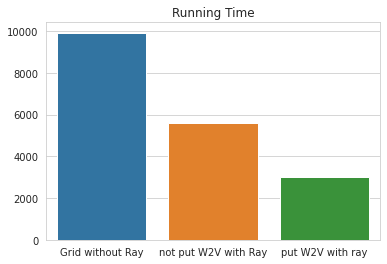

In [268]:
import pandas as pd
# Grid Search without ray : 9924.6s (epoch10)
# W2V without put with ray : 5611.89s (epoch10)
# W2V with put with ray : 3006.70s (epoch10)
ax = sns.barplot(data=pd.DataFrame([[9924.6, 5611.89,3006.7]], columns=["Grid without Ray","not put W2V with Ray","put W2V with ray"]))
ax.set_title("Running Time")

### Random init

<AxesSubplot:>

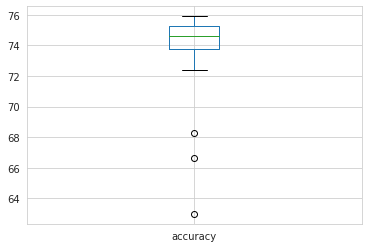

In [326]:
analysis = Analysis("/home/jack/ray_results/rand_baysian_2/")
ray_rand = analysis.dataframe()[['config/pad', 'config/model_type','loss','accuracy','time_this_iter_s']]
ray_rand['accuracy'].plot.box()

### ray 10 epochs with putted w2v

<Figure size 432x288 with 0 Axes>

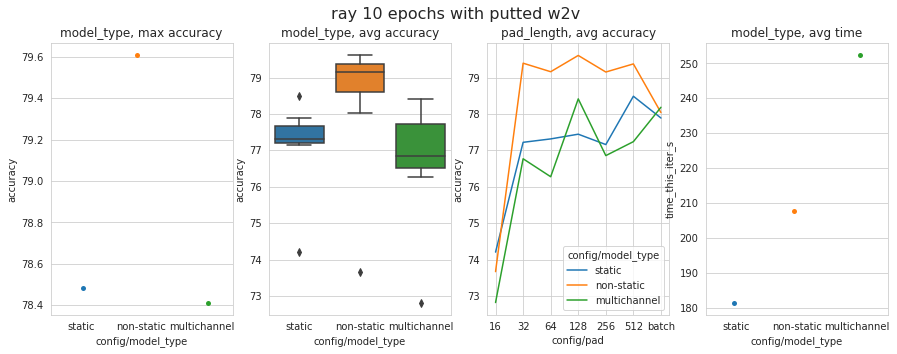

In [300]:
analysis = Analysis("/home/jack/ray_results/DEFAULT_2021-02-01_11-43-37/")
ray_ep10_w2v_t = analysis.dataframe()[['config/model_type', 'config/pad', 'loss','accuracy','time_this_iter_s']]
plots(ray_ep10_w2v_t, "ray 10 epochs with putted w2v")

### ray 15 epochs with putted w2v

<Figure size 432x288 with 0 Axes>

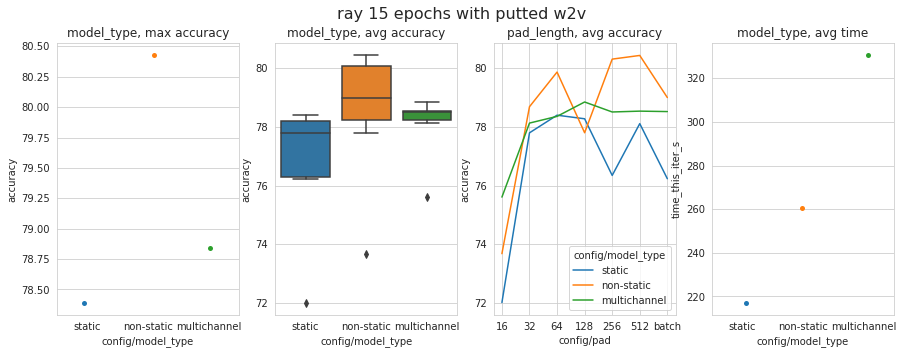

In [301]:
analysis = Analysis("/home/jack/ray_results/DEFAULT_2021-02-01_10-31-23/")
w2v_true_result = analysis.dataframe()[['config/model_type', 'config/pad', 'loss','accuracy','time_this_iter_s']]
plots(w2v_true_result, "ray 15 epochs with putted w2v")

### ray 20 epochs with putted w2v

<Figure size 432x288 with 0 Axes>

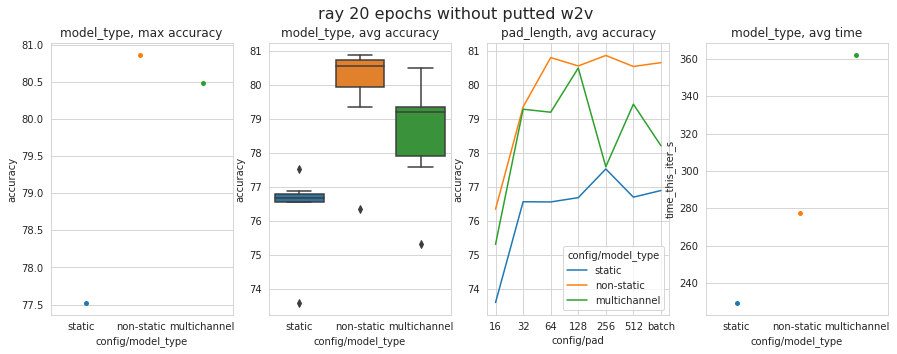

In [302]:
analysis = Analysis("/home/jack/ray_results/DEFAULT_2021-02-01_13-21-59/")
ray_ep10_w2v_t = analysis.dataframe()[['config/model_type', 'config/pad', 'loss','accuracy','time_this_iter_s']]
plots(ray_ep10_w2v_t, "ray 20 epochs without putted w2v")

### ray 30 epochs with putted w2v

<Figure size 432x288 with 0 Axes>

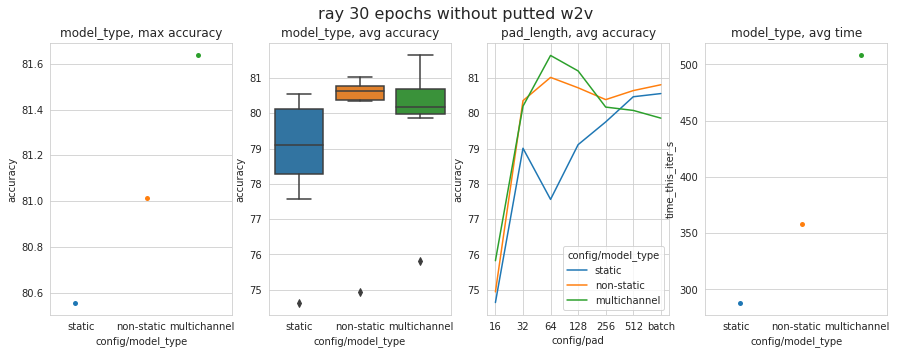

In [303]:
analysis = Analysis("/home/jack/ray_results/DEFAULT_2021-02-01_15-59-33/")
ray_ep30_w2v_t= analysis.dataframe()[['config/model_type', 'config/pad', 'loss','accuracy','time_this_iter_s']]
plots(ray_ep30_w2v_t, "ray 30 epochs without putted w2v")

### NSMC data

<Figure size 432x288 with 0 Axes>

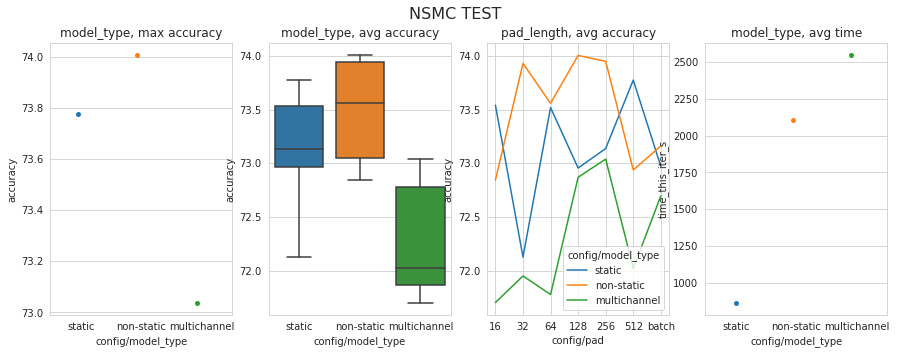

In [304]:
analysis = Analysis("/home/jack/ray_results/DEFAULT_2021-02-01_20-36-33/")
ray_ep30_w2v_t= analysis.dataframe()[['config/model_type', 'config/pad', 'loss','accuracy','time_this_iter_s']]
plots(ray_ep30_w2v_t, "NSMC TEST")